<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Logo-ITM-01.png/1200px-Logo-ITM-01.png" width="300" alt="cognitiveclass.ai logo"  />



#**Notebook**: Análisis y caracterización de variables para el diagnóstico de diabetes en Python.

#**Objetivos**

*   Analizar y describir la estructura de una base de datos centrada en el diagnóstico de la Diabetes.
*   Depurar y extraer información de la base de datos a partir de la limpieza de la misma mediante Python.

*   Profundizar en la relación que hay entre cada variable de la base y el diagnóstico de la Diabetes.






#**Tabla de contenido**

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Presentación y descripción de la base de datos](#0) <br>
2. [Reestruturación y limpieza de la base de datos](#2) <br>
3. [Análisis de las variables en función de los diagnósticos](#3) <br>
4. [Conclusiones respecto a la observación de los datos](#4) <br>

# **1. Presentación y descripción de la base de datos**

##**1.1 Introducción**

Para este proyecto vamos a profundizar y explorar un dataset de pacientes mediante Python, con el fin de examinar que variables fisiológicas influyen más a la hora de brindar un diagnóstico positivo de diabetes. Para ello, es necesario observar la estructura de la base de datos y comprender cada tipo de variable.

*Inicialmente, nos centraremos en registrar la base de datos.*

In [2]:
#Importamos las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargamos los archivos de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Cargamos y leemos la base de datos.
file_path = r'/content/drive/MyDrive/Algoritimía y programación/diabetes.csv'
data_diabetes = pd.read_csv(file_path)
data_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#Observamos las dimensiones de la base de datos.
print(f'La base de datos tiene {len(data_diabetes.index)} número de filas y {len(data_diabetes.columns)} número de columnas')

La base de datos tiene 768 número de filas y 9 número de columnas


In [6]:
#Miramos información de la base de datos.
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Seguimos en ello.
data_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##**1.2 Descripción**

Esta base de datos contiene información sobre 768 personas, contando con características como el grosor de la piel, insulina, presión arterial, glucosa, entre otras. Y con dicha información se busca analizar si el paciente tiene diabetes o no. Observemos cada columna:

- Age: Edad.
- Pregnancies: Número de embarazos.
- Glucose: Nivel de glucosa en la sangre.
- BloodPressure: Medición de la presión arterial.
- SkinThickness: Indica el grosor de la piel.
- Insulin: Nivel de insulina en la sangre.
- BMI: Indice de masa corporal.
- DiabetesPedigreeFunction: Porcentaje de diabetes de caracter hereditaria.
- Outcome: Estado del diagnóstico de diabetes, donde 1 indica Sí y 0 indica No.

Cada uno de estos datos ofrece información relevante para dar un diagnóstico adecuado.

# **2. Reestructuración y limpieza de la base de datos**



##**2.1 Inspección del dataset**

En este apartado se estudiará si la base de datos presenta alguna anomalía en la información que contenga, ya sean datos duplicados, valores no existentes o inconsistencias. Esto lo haremos mediante la inspección en la estructura del dataset y posteriormente, vamos a depurar la base de datos para poder analizarla mejor.

In [8]:
#Indicamos si hay valores nulos en el DataFrame.
data_diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
#Indicamos si hay valores duplicados.
print(f'El total de valores duplicados es de {data_diabetes.duplicated().sum()}')

El total de valores duplicados es de 0


In [10]:
#Miramos los valores únicos.
data_diabetes.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


Luego de observar la base de datos nos damos cuenta que:

*   No hay valores nulos.
*   No hay elementos duplicados.
*   Cada columna cuenta con al menos un valor diferente, por lo que hay que tenerlas en cuenta a todas.


##**2.2 Busqueda de valores atípicos o inconsistencias**

Ahora, procedemos a investigar si el dataset presenta inconsistencias o información que no es común. Para ello, analizamos la cantidad de ceros que hay en las columnas.

In [11]:
#Para la columna 'Pregnancies'.
Pregnancies = (data_diabetes['Pregnancies'] == 0).sum()
print(f'La cantidad de ceros en la columna Pregnancies es de {Pregnancies}')

La cantidad de ceros en la columna Pregnancies es de 111


In [12]:
#Para la columna 'Glucose'.
Glucose = (data_diabetes['Glucose'] == 0).sum()
print(f'La cantidad de ceros en la columna Glucose es de {Glucose}')

La cantidad de ceros en la columna Glucose es de 5


In [13]:
#Reemplazamos los valores iguales a 0 por valores np.nan.
data_diabetes['Glucose'] = data_diabetes['Glucose'].replace(0, np.nan)
#Utilizamos el método mean().
data_diabetes['Glucose'] = data_diabetes['Glucose'].fillna(data_diabetes['Glucose'].mean())
#Miramos como queda.
data_diabetes['Glucose']

,Glucose
0,148.0
1,85.0
2,183.0
3,89.0
4,137.0
...,...
763,101.0
764,122.0
765,121.0
766,126.0


In [14]:
#Para la columna 'BloodPressure'.
BloodPressure = (data_diabetes['BloodPressure'] == 0).sum()
print(f'La cantidad de ceros en la columna BloodPressure es de {BloodPressure}')

La cantidad de ceros en la columna BloodPressure es de 35


In [15]:
#Reemplazamos los valores iguales a 0 por valores np.nan.
data_diabetes['BloodPressure'] = data_diabetes['BloodPressure'].replace(0, np.nan)
#Utilizamos el método mean().
data_diabetes['BloodPressure'] = data_diabetes['BloodPressure'].fillna(data_diabetes['BloodPressure'].mean())
#Miramos como queda.
data_diabetes['BloodPressure']

,BloodPressure
0,72.0
1,66.0
2,64.0
3,66.0
4,40.0
...,...
763,76.0
764,70.0
765,72.0
766,60.0


In [16]:
#Para la columna 'SkinThickness'.
SkinThickness = (data_diabetes['SkinThickness'] == 0).sum()
print(f'La cantidad de ceros en la columna SkinThickness es de {SkinThickness}')

La cantidad de ceros en la columna SkinThickness es de 227


In [17]:
#Reemplazamos los valores iguales a 0 por valores np.nan.
data_diabetes['SkinThickness'] = data_diabetes['SkinThickness'].replace(0, np.nan)
#Utilizamos el método mean().
data_diabetes['SkinThickness'] = data_diabetes['SkinThickness'].fillna(data_diabetes['SkinThickness'].mean())
#Miramos como queda.
data_diabetes['SkinThickness']

,SkinThickness
0,35.00000
1,29.00000
2,29.15342
3,23.00000
4,35.00000
...,...
763,48.00000
764,27.00000
765,23.00000
766,29.15342


In [18]:
#Para la columna 'Insulin'.
Insulin = (data_diabetes['Insulin'] == 0).sum()
print(f'La cantidad de ceros en la columna Insulin es de {Insulin}')

La cantidad de ceros en la columna Insulin es de 374


In [19]:
#Reemplazamos los valores iguales a 0 por valores np.nan.
data_diabetes['Insulin'] = data_diabetes['Insulin'].replace(0, np.nan)
#Utilizamos el método mean().
data_diabetes['Insulin'] = data_diabetes['Insulin'].fillna(data_diabetes['Insulin'].mean())
#Miramos como queda.
data_diabetes['Insulin']

,Insulin
0,155.548223
1,155.548223
2,155.548223
3,94.000000
4,168.000000
...,...
763,180.000000
764,155.548223
765,112.000000
766,155.548223


In [20]:
#Para la columna 'BMI'.
BMI = (data_diabetes['BMI'] == 0).sum()
print(f'La cantidad de ceros en la columna BMI es de {BMI}')

La cantidad de ceros en la columna BMI es de 11


In [21]:
#Reemplazamos los valores iguales a 0 por valores np.nan.
data_diabetes['BMI'] = data_diabetes['BMI'].replace(0, np.nan)
#Utilizamos el método mean().
data_diabetes['BMI'] = data_diabetes['BMI'].fillna(data_diabetes['BMI'].mean())
#Miramos como queda.
data_diabetes['BMI']

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [22]:
#Para la columna 'DiabetesPedigreeFunction'.
DiabetesPedigreeFunction = (data_diabetes['DiabetesPedigreeFunction'] == 0).sum()
print(f'La cantidad de ceros en la columna DiabetesPedigreeFunction es de {DiabetesPedigreeFunction}')

La cantidad de ceros en la columna DiabetesPedigreeFunction es de 0


In [23]:
#Para la columna 'Age'.
Age = (data_diabetes['Age'] == 0).sum()
print(f'La cantidad de ceros en la columna Age es de {Age}')

La cantidad de ceros en la columna Age es de 0


#**3. Análisis de las variables en función de los diagnósticos**

Con respecto a lo visto anteriormente en la limpieza de la base de datos, es necesario profundizar en cada variable para explicar su importancia en relación con la diabetes y porqué, dependiendo del caso, se hizo el reemplazo de valores en el apartado anterior. Para ello, se observarán medidas estadísticas como la media, mediana, valor máximo, mínimo, entre otros.

##**3.1 Examinación de resultados**



In [24]:
#Miramos los datos de cada columna.
for columna in data_diabetes.columns:
  print(f'---{columna}---')
  print(data_diabetes[columna].describe())

---Pregnancies---
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
---Glucose---
count    768.000000
mean     121.686763
std       30.435949
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
---BloodPressure---
count    768.000000
mean      72.405184
std       12.096346
min       24.000000
25%       64.000000
50%       72.202592
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
---SkinThickness---
count    768.000000
mean      29.153420
std        8.790942
min        7.000000
25%       25.000000
50%       29.153420
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
---Insulin---
count    768.000000
mean     155.548223
std       85.021108
min       14.000000
25%      121.500000
50%      155.548223
75%      155.54822

***Pregnancies***

*   El rango del número de embarazos es: (Min: 0 - Max: 17)
*   La mediana (3) se ve superada por la media (3.84), indicando que la distribución de los datos se inclina un poco más hacía la derecha, por lo que hay pocas mujeres con muchos embarazos.

***Glucose***

*   El rango de los valores en la glucosa es: (Min: 44 - Max: 199)
*   La mediana (117) se ve superada por la media (121.68), indicando que la distribución de los datos se inclina un poco más hacía la derecha, es decir, en general los pacientes presentan altos niveles de glucosa.

***BloodPressure***

*  El rango de los valores en la presión arterial es: (Min: 24 - Max: 122)
*  La mediana (72.2) es muy similar a la media (72.4), indicando que la distribución de los datos es uniforme.

***SkinThickness***

*  El rango de los valores en el grosor de la piel es: (Min: 7 - Max: 99)
*  La mediana (29.15) es muy similar a la media (29.15), indicando que la distribución de los datos es uniforme.

***Insulin***

*  El rango de los valores en la insulina es: (Min:14  - Max:846)
*  La mediana (155.54) es muy similar a la media (155.54), indicando que la distribución de los datos es uniforme.

***BMI***

*  El rango de los valores en el BMI es: (Min: 18.2 - Max: 67.1)
*  La mediana (32.4) es muy similar a la media (32.4), indicando que la distribución de los datos es uniforme.

***DiabetesPedigreeFunction***

*   El rango de los valores en el Porcentaje de diabetes de caracter hereditaria es: (Min: 0.07 - Max: 2.42)
*  La mediana (0.37) se ve superada por la media (0.47), indicando que la distribución de los datos se inclina un poco más hacía la derecha, lo que implica que hay varias familias con un fuerte historial diabético.

***Age***

*  El rango de los valores en la edad es: (Min: 21 - Max: 81 )
*  La mediana (29) se ve superada por la media (33.2), indicando que la distribución de los datos se inclina un poco más hacía la derecha, por lo que la tendencia va hacía pacientes mayores.

##**3.2 Definiciones y explicaciones**


Para comprender y estudiar el previo análisis de datos, es necesario definir varios conceptos que son claves a la hora de investigar y diagnosticar la diabetes. Por lo que, vamos a explicarlos brevemente:

**Diabetes:**

*  Es una enfemedad metabólica crónica que se caracteriza por altos niveles de glucosa en sangre, debido a problemas en la producción o eficacia de la insulina.

**Glucosa:**

*   Concentración de azúcar en la sangre, además de ser la principal fuente de energía del cuerpo. Niveles estándar de glucosa en ayunas: Cifras entre 80-130 mg/dl

**Insulina:**

*   Hormona que produce el pancreas y se encarga de regular el nivel de glucosa en la sangre. Niveles estándar en ayunas: Cifras entre 5 - 25. Si se ha comido, puede subir y quedar entre: 60 - 90.


**Presión arterial:**

*   Fuerza de la sangre al circular por las arterias. Niveles regulares: Cifras entre 80 - 120.

**Embarazos:**

*   En el embarazo se presentan unos desórdenes metabólicos en donde se presenta una gran concentración de glucosa gracias a una insuficiente secreción de insulina.

**Grosor de la piel:**

*  El grosor de la piel está determinado por el colágeno en mayor medida y aquel aumenta en presencia de un tipo de diabetes específica.

**Edad:**

*   Al envejecer los organos van perdiendo gradualmente sus funciones, por lo que controlar la insulina a edades avanzadas se dificulta, provocando un exceso de glucosa.

**Fuentes de información:**

*   https://www.who.int/news-room/fact-sheets/detail/diabetes
*   https://pubmed.ncbi.nlm.nih.gov/2721339/
*   https://www.veri.co/learn/optimal-fasting-insulin-level
*   https://diabetesjournals.org/care/article/47/Supplement_1/S20/153954/2-Diagnosis-and-Classification-of-Diabetes


##**3.3 Observación de gráficas**

Para finalizar el estudio de los datos vamos a utilizar gráficas con el fin de identificar patrones y ver como están distribuidos los valores presentes en el dataset. De esa manera, podemos relacionar datos y obtener conclusiones más precisas. Permitiendo, por ejemplo, encontrar la influencia de cierta variable en el diagnóstico de diabetes.

<function matplotlib.pyplot.show(close=None, block=None)>

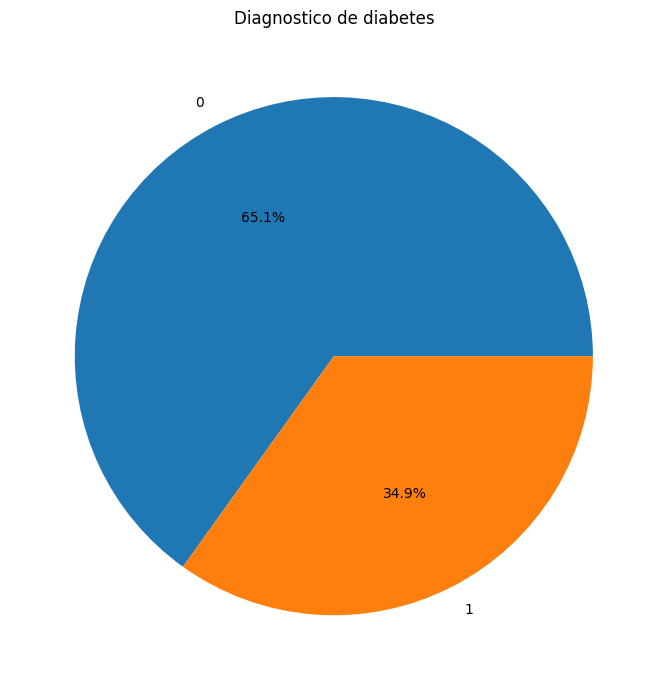

In [25]:
#Creamos un gráfico de torta.
Diagnostico = data_diabetes['Outcome'].value_counts()

plt.figure(figsize = (7, 7))
plt.pie(Diagnostico, labels = Diagnostico.index, autopct = '%1.1f%%')
plt.title('Diagnostico de diabetes')
plt.tight_layout()
plt.show

Esto quiere decir que la mayoría de los pacientes de nuestra base de datos obtuvieron un diagnóstico negativo sobre la diabetes.

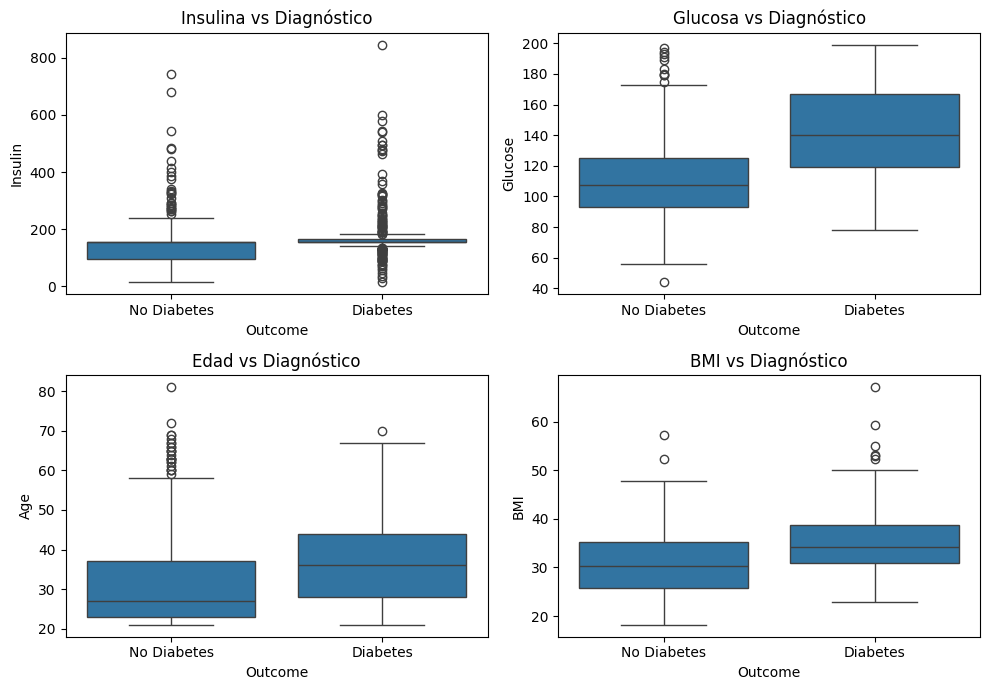

In [26]:
#Hacemos un gráfico con varios de ellos.
plt.figure(figsize = (10, 7))

plt.subplot(2, 2, 1)
sns.boxplot(x='Outcome', y='Insulin', data=data_diabetes)
plt.title('Insulina vs Diagnóstico')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.subplot(2, 2, 2)
sns.boxplot(x='Outcome', y='Glucose', data=data_diabetes)
plt.title('Glucosa vs Diagnóstico')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.subplot(2, 2, 3)
sns.boxplot(x='Outcome', y='Age', data=data_diabetes)
plt.title('Edad vs Diagnóstico')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.subplot(2, 2, 4)
sns.boxplot(x='Outcome', y='BMI', data=data_diabetes)
plt.title('BMI vs Diagnóstico')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

Al utilizar boxplots, podemos ver la distribución de los valores, al igual que la presencia de valores atípicos. En el caso de la insulina, por ejemplo, vemos un número muy grande de valores irregulares. Justamente, ello concuerda con lo dicho sobre el rango y las medidas de los valores de dicha variable fisiológica.

In [27]:
#Vamos a generar gráficas de correlaciones.
correlacion = data_diabetes.corr()
correlacion

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


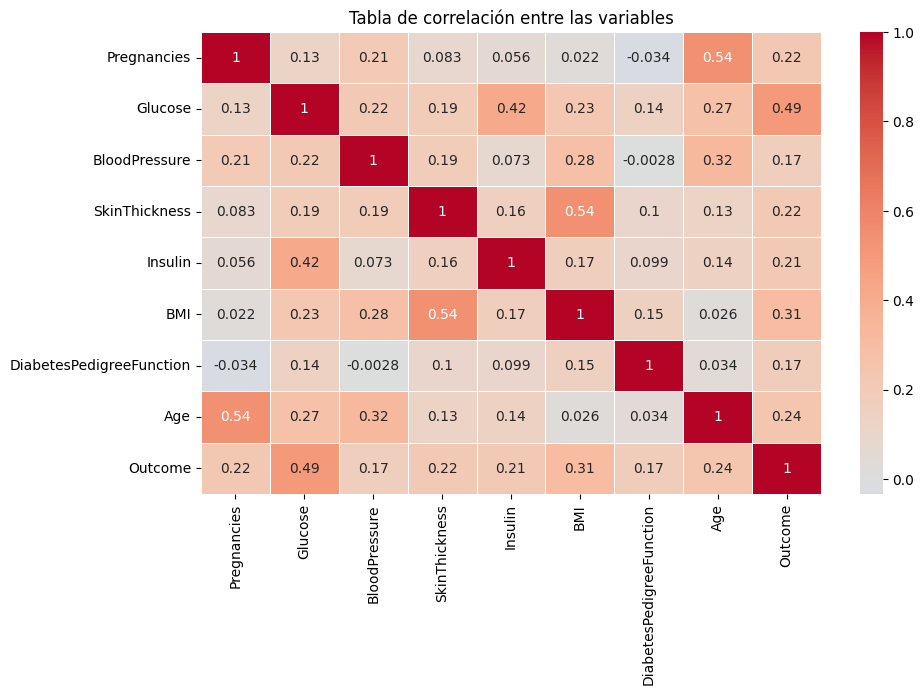

In [28]:
#Miramos como se relacionan los datos.
plt.figure(figsize=(10,6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Tabla de correlación entre las variables")
plt.show()

El objetivo de esta matriz/tabla es analizar y observar las relaciones que hay entre las diversas variables de la base de datos, con el fin de encontrar cuales de dichas variables tienen más influencia a la hora de diagnosticar la diabetes. En este caso, como podemos ver, son la glucosa, el índice de masa corporal, los embarazos y la edad las que tienen mayor efecto sobre el paciente. Sin embargo, debemos tener en cuenta la presencia de datos atípicos en el dataset y de como estos pueden afectar las relaciones entre los demás datos.

#**4. Conclusiones respecto a la observación de los datos**

###**4.1 Descubrimientos generales**

Como vimos, el 34,9% de la población obtuvo un diagnóstico positivo de diabetes, ello implica una buena parte de los pacientes del dataset. Además, se puede notar como dichos pacientes siguen ciertos patrones estándar, como altos niveles de glucosa o presencia de obesidad, factores muy comunes en la población mundial de diabéticos.

###**4.2 Conclusiones respecto a las variables**

***Glucosa***

*   Resulta ser el factor más determinante (correlación: 0.49).
*   Pacientes con altos niveles de glucosa tienden a ser positivos en cuanto al diagnóstico.

***BMI***

*   Es la segunda variable con mayor influencia (correlación: 0.31).
*   Generalmente, los pacientes con un alto índice de masa corporal deben dicha causa a problemas metabólicos o relacionados con la diabetes.

***Edad***

*   Tercera variable con más relación (correlación: 0, 24).
*   En pacientes con una edad avanzada, la combinación de diversos factores y afectaciones terminan por ser determinantes a la hora de diagnosticar la enfermedad.

**Otras variables***

*   En cuanto a las demás variables, según nuestra matriz de correlación y lo dicho anteriormente, si son importantes, pero en un menor grado. Ya que son factores que se relacionan en función de la glucosa, como la insulina, por ejemplo.












###**4.3 Limitaciones e inconsistencias**

A raíz del análisis hecho y viendo las gráficas, encontramos un número elevado de valores atípicos, sobre todo con respecto a la insulina. Esto afecta los resultados, ya que son valores muy alejados de lo que se considera normal, se puede deber a errores en las mediciones o casos clínicos extremos.

Es pertinente tener en cuenta que al ser una población específica, puede que estos resultados no sean el común denominador para la población mundial, sin embargo, nos permiten comprender como funciona la diabetes y en función de que variables o características.

También se debe considerar que para esta base de datos en específico, podrían hacer falta características como los hábitos de vida (actividad física, dieta) o los síntomas de los pacientes, con el fin de profundizar más en las causas de la diabetes.

###**4.4 Conclusión final**

Con los análisis realizados, podemos entender mejor como es que se pueden relacionar las variables de una base de datos con respecto al objeto de estudio. Por ejemplo, para fines clínicos, podemos utilizar esta información para detectar y prevenir la diabetes, así como buscar formas de controlar características en la población, como la glucosa y la obesidad. De manera que, se puede proceder a étapas próximas en una investigación